In [487]:
import numpy as np
import scipy.integrate as integrate
from matplotlib import pyplot as plt

In [488]:
def Integrand(x,a):
    return(x**(a-1)*np.exp(-1*x))

In [489]:
def Trapizod(x,a,x1,x2,num):    
    dx = (x2-x1)/num
    trapizod = integrate.trapz(Integrand(x,a), dx=dx)
    return(trapizod)

In [490]:
def Guassian(x,a,x1,x2,num):
    placeholder1 = x
    guassian = integrate.quadrature(Integrand, x1, x2, a, maxiter = int(num))
    return(guassian)

In [491]:
def Simpsons(x,a,x1,x2,num):
    dx = (x2-x1)/num
    simpsons = integrate.simps(Integrand(x,a), dx=dx)
    return(simpsons)

In [492]:
def Romberg(x,a,x1,x2,num):
    placeholder1 = x
    dx = (x2-x1)/(num+1)
    x =np.arange(x1, x2, dx)
    romberg = integrate.romb(Integrand(x,a), dx = dx)
    return(romberg)

In [493]:
def MonteCarlo(x,a,x1,x2,num):
    #maybe rewrite so that it has sections
    placeholder1 = x
    fmax = Integrand(a-1,a) # for x: 0-5
    fmin = 0.0
    NumberOfPoints = num*1000 #Where num is the "Number of sections" and 100000 is the number of points per section
    count = 0
    for i in range(int(NumberOfPoints)):
        x = np.random.random()
        x = x*(x2-x1)+x1
        y = np.random.random()
        y = y*(fmax-fmin)+fmin
        if y <= Integrand(x,a):
            count += 1
        montecarlo = (count/NumberOfPoints)*(x2-x1)*(fmax-fmin)
    return(montecarlo)

In [494]:
def Factorial(x):
    factorial = 1
    for i in range(int(x+1)):
        if i == 0:
            i = 1
        factorial = factorial*i
    return(factorial)

Part a)

In [495]:
x1 = 0.0
x2 = 5.0
a = 2
num = np.empty([6,1],dtype = float)
for i in range(len(num)):
    num[i] = int(2**(i+3))
trap = np.empty([len(num),1],dtype = float)
guas = np.empty([len(num),1],dtype = float)
simp = np.empty([len(num),1],dtype = float)
romb = np.empty([len(num),1],dtype = float)
mont = np.empty([len(num),1],dtype = float)

In [496]:
for i in range(len(num)):
    x = np.linspace(x1,x2,num[i])
    trap[i] = Trapizod(x,a,x1,x2,num[i])
    guas[i] = Guassian(x,a,x1,x2,num[i])[0]
    simp[i] = Simpsons(x,a,x1,x2,num[i])
    romb[i] = Romberg(x,a,x1,x2,num[i])
    mont[i] = MonteCarlo(x,a,x1,x2,num[i])

C:\Users\BaylorFain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'numpy.ndarray'> cannot be safely interpreted as an integer.
  


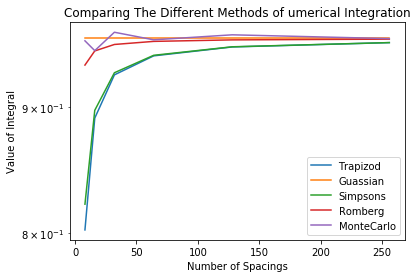

In [497]:
plt.plot(num,trap, label = "Trapizod")
plt.plot(num,guas, label = "Guassian")
plt.plot(num,simp, label = "Simpsons")
plt.plot(num,romb, label = "Romberg")
plt.plot(num,mont, label = "MonteCarlo")
plt.xlabel("Number of Spacings")
plt.ylabel("Value of Integral")
plt.title("Comparing The Different Methods of Numerical Integration")
plt.legend()
plt.yscale("log")
plt.show()

Below, I choose not to put the y axis in to log scale, because the Monte Carlo method sometimes returns negative error.

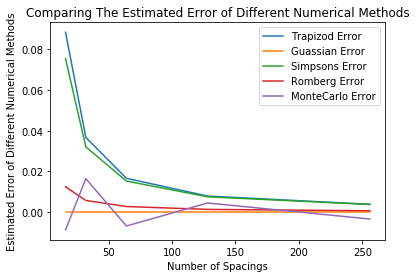

In [499]:
traperr = trap[1:]-trap[:-1]
guaserr = guas[1:]-guas[:-1]
simperr = simp[1:]-simp[:-1]
romberr = romb[1:]-romb[:-1]
monterr = mont[1:]-mont[:-1]
plt.plot(num[1:],traperr, label = "Trapizod Error")
plt.plot(num[1:],guaserr, label = "Guassian Error")
plt.plot(num[1:],simperr, label = "Simpsons Error")
plt.plot(num[1:],romberr, label = "Romberg Error")
plt.plot(num[1:],monterr, label = "MonteCarlo Error")
plt.xlabel("Number of Spacings")
plt.ylabel("Estimated Error of Different Numerical Methods")
plt.title("Comparing The Estimated Error of Different Numerical Methods")
plt.legend()
plt.show()

Part b

I well use the Guassian Quadrature method for the remainder of problem 1.

In the graph's in part a, it is clear to see that Guassian Quadrature returns an acurate value of an integral with low values of N.

I will use N = 63 for the number of spacings, because Guassian Quadrature returns an acurate value at this N value. The greater N values have little effect.

In [551]:
x1 = 0.0
x2 = 5.0
a = np.array([2,3,4])
num = 63
guas = np.empty([len(a),1],dtype = float)

In [552]:
for i in range(len(a)):
    x = np.linspace(x1,x2,num)
    guas[i] = Guassian(x,a[i],x1,x2,num)[0]

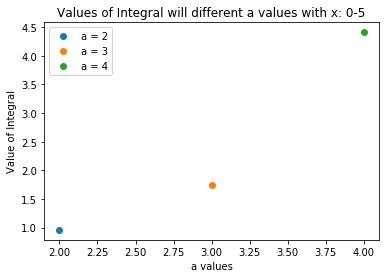

In [553]:
for i in range(len(a)):
    plt.plot(a[i],guas[i], "o", label = "a = "+str(a[i]))
plt.xlabel("a values")
plt.ylabel("Value of Integral")
plt.title("Values of Integral will different a values with x: 0-5")
plt.legend()
plt.show()

Part c

To be able integrate to $\infty$.

Let $x = \frac{c*z}{1-z}$
so $dx = \frac{c*dz}{(1-z)^2}$

Now our Integrand becomes

$ ((\frac{c*z}{1-z})^{(a-1)}*e^{(\frac{-c*z}{1-z})}*\frac{c}{(1-z)^{2}}$

We can now integtrate from 0 to 1 and it will be the same as integrating from 0 to $\infty$

One concequentes of makeing this transform is that the peak of the function will be moved and sometimes the peak will lie close to the edge of our new domain.

The original function

Text(0.5,1,'Shape of the Original Integrand')

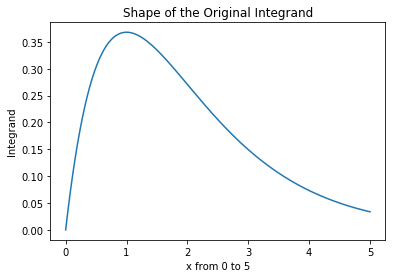

In [554]:
a = 2
x = np.linspace(x1,x2,128)
plt.plot(x,Integrand(x,a))
plt.xlabel("x from 0 to 5")
plt.ylabel("Integrand")
plt.title("Shape of the Original Integrand")
plt.show()

after the transform

C:\Users\BaylorFain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\BaylorFain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Text(0.5,1,'Shape of the Integrand after transform')

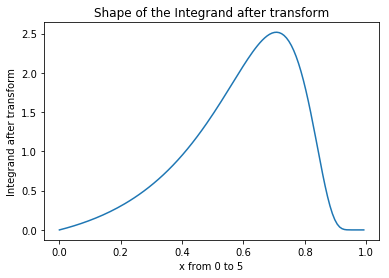

In [540]:
a = 2
x = np.linspace(0,1.0,128)
c = 1
plt.plot(x,(c*x/(1-x))**(a-1)*np.exp(-1*(c*x/(1-x)))*(c/(1-x)**2))
plt.xlabel("x from 0 to 5")
plt.ylabel("Integrand after transform")
plt.title("Shape of the Integrand after transform")
plt.show()

For this case the fucntion is more so just flipped, but we will still want to bring the peak closer to the middle of the domain.

There are a few more tricks that can be done to make this function behave better for integrating.

First, let $(\frac{c*z}{(1-z)})^{(a-1)} = e^{({ln(\frac{c*z}{(1-z)})*(a-1)})}$

C:\Users\BaylorFain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\BaylorFain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\BaylorFain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Text(0.5,1,'Shape of the Integrand more transforms')

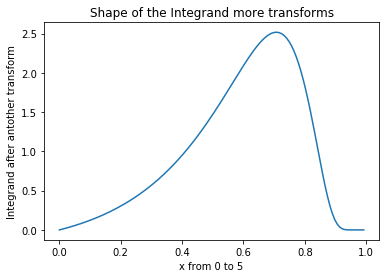

In [555]:
a = 2
x = np.linspace(0,1.0,128)
c = 1
plt.plot(x,np.exp(np.log(c*x/(1-x))*(a-1))*np.exp(-1*(c*x/(1-x)))*(c/(1-x)**2))
plt.xlabel("x from 0 to 5")
plt.ylabel("Integrand after antother transform")
plt.title("Shape of the Integrand more transforms")
plt.show()

This moves more of the variables to the exponent so that more number are simply mutiplied together first, the e is risin to a power. Allowing for a more acurate expression.

Now if we let $c = 2$, the peak of our function is in the middle of our domain. MAkeing the function more friendly to numerical integration.

C:\Users\BaylorFain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\BaylorFain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\BaylorFain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Text(0.5,1,'Shape of the New Integrand')

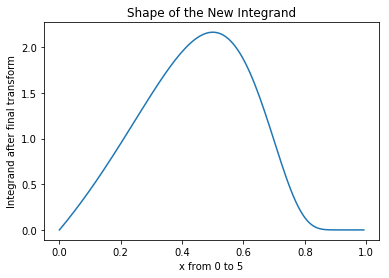

In [542]:
a = 2
x = np.linspace(0,1.0,128)
c = 2
plt.plot(x,np.exp(np.log(c*x/(1-x))*(a-1))*np.exp(-1*(c*x/(1-x)))*(c/(1-x)**2))
plt.xlabel("x from 0 to 5")
plt.ylabel("Integrand after final transform")
plt.title("Shape of the New Integrand")
plt.show()

Finally our function/integrand is

$ e^{(ln({\frac{2*z}{(1-z)})*(a-1)})}*e^{(\frac{-2*z}{1-z})}*\frac{2}{(1-z)^{2}}$

Part d

In [523]:
def IntegrandInf(z,a):
    return(np.exp(np.log((2*z)/(1-z))*(a-1))*np.exp(-1*(2*z/(1-z)))*(2/(1-z)**2))

In [524]:
def GuassianInf(x,a,x1,x2, num):
    placeholder1 = x
    guassian = integrate.quadrature(IntegrandInf, x1, x2, a, maxiter = int(num))
    return(guassian)

In [525]:
z1 = 0.0
z2 = 1.0
a = 1.5
num = 63

In [526]:
z = np.linspace(z1,z2,num)
guas = GuassianInf(z,a,z1,z2, num)
print(guas)
print(0.5*np.sqrt(np.pi))

(0.8862280627895901, 5.5471656712491324e-08)
0.8862269254527579


C:\Users\BaylorFain\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\quadrature.py:201: AccuracyWarning: maxiter (63) exceeded. Latest difference = 5.547166e-08
  AccuracyWarning)


Part e

In [545]:
z1 = 0.0
z2 = 1.0
a = np.arange(1,10.5,0.5)
num = 63
guas = np.empty([len(a),1],dtype = float)

In [546]:
for i in range(len(a)):
    z = np.linspace(z1,z2,num)
    guas[i] = GuassianInf(z,a[i],z1,z2, num)[0]

C:\Users\BaylorFain\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\quadrature.py:201: AccuracyWarning: maxiter (63) exceeded. Latest difference = 5.547166e-08
  AccuracyWarning)


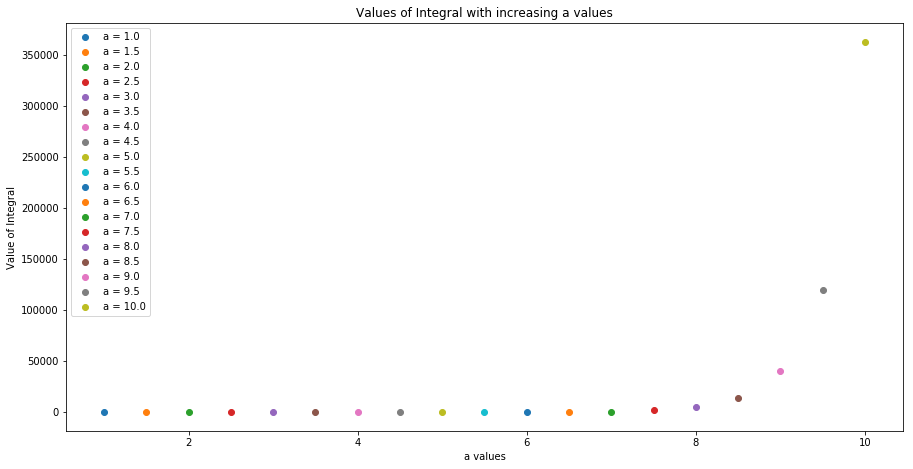

In [548]:
plt.figure(figsize=(15,7.5))
for i in range(len(a)):
    plt.plot(a[i],guas[i], "o", label = "a = "+str(a[i]))
plt.xlabel("a values")
plt.ylabel("Value of Integral")
plt.title("Values of Integral with increasing a values")
plt.legend()
plt.show()

In [530]:
z1 = 0.0
z2 = 1.0
a = [0,1,2,3,4]
num = 63
z = np.linspace(z1,z2,num)
guas = np.empty([len(a),1],dtype = float)
for i in range(len(a)):
    guas[i] = GuassianInf(z,a[i]+1,z1,z2, num)[0]
    print(guas[i])
    print(np.math.factorial(a[i]))
    print(Factorial(a[i]))
    

[1.]
1
1
[1.00000001]
1
1
[1.99999998]
2
2
[6.00000095]
6
6
[24.00000031]
24
24
